# Demonstration of Principal Component Analysis (PCA)

by **Ahmet Sacan,** modified by **Tony K. Okeke**

In [1]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

In [2]:
# Generate data
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

## Plot Raw Data

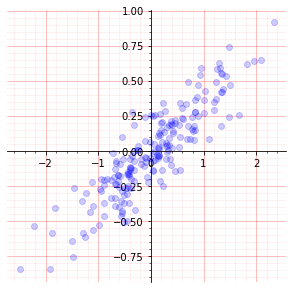

In [3]:
fig = plt.figure(figsize=(5, 5))

if X.shape[1] == 2:
    ax = fig.add_subplot()
    ax.plot(X[:, 0], X[:, 1], 'bo', alpha=0.2)

    # Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['bottom'].set_position('zero')  # type: ignore
    ax.spines['left'].set_position('zero')    # type: ignore
    
    # Eliminate upper and right axes
    ax.spines[['right', 'top']].set_visible(False)

    # Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # Show grid
    ax.minorticks_on()
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='red', 
            alpha=0.3)
    ax.grid(which='major', linestyle='-', linewidth='0.5', color='red', 
            alpha=0.5)
else:
    print("Data has more than 2 dimensions. Can't plot.")

## PCA

$$Y = XP$$

### Using `scikit-learn`

#### Calculate Principal Components

In [4]:
# Determine the principal components
pca = PCA(n_components=2)
pca.fit(X)

# Store results
P = pca.components_
Y = pca.transform(X)
V = pca.explained_variance_ratio_

# Print results
print(f"Percent Variance Explained: {V * 100}")
print(f"Cummulative Percent Variances: {np.cumsum(V*100)}")

Percent Variance Explained: [97.63410074  2.36589926]
Cummulative Percent Variances: [ 97.63410074 100.        ]


#### Plot Principal Components on the Original Data

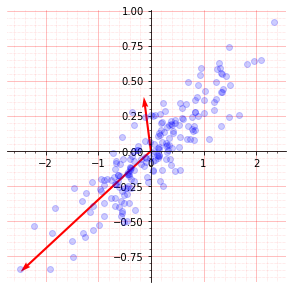

In [5]:
fig, ax = plt.subplots(figsize=(5, 5))

# Plot raw data
ax.plot(X[:, 0], X[:, 1], 'bo', alpha=0.2)

# Plot principal components
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, 
              color='red')

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['bottom'].set_position('zero')  # type: ignore
ax.spines['left'].set_position('zero')    # type: ignore

# Eliminate upper and right axes
ax.spines[['right', 'top']].set_visible(False)

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Show grid
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='red', alpha=0.3)
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red', alpha=0.5)

#### Plot Projected Data

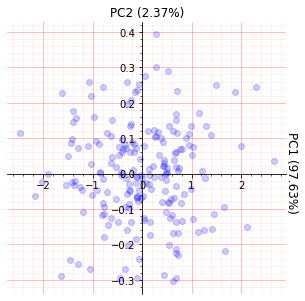

In [6]:
fig, ax = plt.subplots(figsize=(5, 5))

# Plot projected data
ax.plot(Y[:, 0], Y[:, 1], 'bo', alpha=0.2)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['bottom'].set_position('zero')  # type: ignore
ax.spines['left'].set_position('zero')    # type: ignore

# Axis labels
ax.set_xlabel(f'PC1 ({V[0] * 100:.2f}%)', fontsize=12)
ax.set_ylabel(f'PC2 ({V[1] * 100:.2f}%)', fontsize=12)

# Move labels to the right and top
ax.xaxis.label.set_rotation(-90)
ax.xaxis.set_label_coords(1.02, 0.6)
ax.yaxis.label.set_rotation(0)
ax.yaxis.set_label_coords(0.5, 1.01)

# Eliminate upper and right axes
ax.spines[['right', 'top']].set_visible(False)

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Show grid
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='red', alpha=0.3)
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red', alpha=0.5)

#### Reconstruct the Data

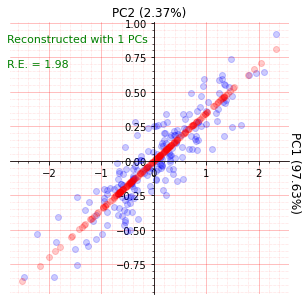

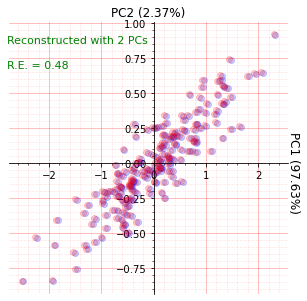

In [7]:
for i in range(X.shape[1]):
    # Reconstruct data
    X_rec = np.dot(Y[:, :i+1], P[:i+1, :])

    fig, ax = plt.subplots(figsize=(5, 5))

    # Plot raw data
    ax.plot(X[:, 0], X[:, 1], 'bo', alpha=0.2)

    # Plot reconstructed data
    ax.plot(X_rec[:, 0], X_rec[:, 1], 'ro', alpha=0.2)

    # Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['bottom'].set_position('zero')  # type: ignore
    ax.spines['left'].set_position('zero')    # type: ignore

    # Axis labels
    ax.set_xlabel(f'PC1 ({V[0] * 100:.2f}%)', fontsize=12)
    ax.set_ylabel(f'PC2 ({V[1] * 100:.2f}%)', fontsize=12)

    # Move labels to the right and top
    ax.xaxis.label.set_rotation(-90)
    ax.xaxis.set_label_coords(1.02, 0.6)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.set_label_coords(0.5, 1.01)

    # Eliminate upper and right axes
    ax.spines[['right', 'top']].set_visible(False)

    # Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # Calculate reconstruction error
    error = np.sqrt(np.sum((X - X_rec)**2).mean())  # RMSE

    # Add annotation
    ax.annotate(
        f'Reconstructed with {i+1} PCs', xy=(0, 0), xytext=(-2.8, 0.88), 
        color='green', fontsize=11, ha='left', va='center'
    )
    ax.annotate(
        f'R.E. = {error:.2f}', xy=(0, 0), xytext=(-2.8, 0.7), color='green',
        fontsize=11, ha='left', va='center'
    )

    # Show grid
    ax.minorticks_on()
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='red', alpha=0.3)
    ax.grid(which='major', linestyle='-', linewidth='0.5', color='red', alpha=0.5)

### From Scratch (using `numpy`)